<a href="https://colab.research.google.com/github/JPranitha-33/Cuisine-prediction/blob/master/Cuisine_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!ls


sample_data  test.json.zip  train.json.zip


**Topic**


1.   Uploading Dataset to Google Colab
2.   Import Dependencies



In [0]:
import pandas as pd 
import numpy as np


In [0]:
!unzip train.json.zip
!unzip test.json.zip
!unzip sample_submission.csv.zip

Archive:  train.json.zip
replace train.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: train.json              
replace __MACOSX/._train.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: __MACOSX/._train.json   
Archive:  test.json.zip
replace test.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  sample_submission.csv.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


**Load Dataset**

In [0]:
train = pd.read_json("train.json")
test = pd.read_json("test.json")
sample = pd.read_csv("sample_submission.csv")

In [0]:
train.shape, test.shape

((39774, 3), (9944, 2))

In [0]:
train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [0]:
train["ing"] = train["ingredients"].apply(lambda x: str(x).strip('[]'))

In [0]:
train["ing"].head()

0    'romaine lettuce', 'black olives', 'grape toma...
1    'plain flour', 'ground pepper', 'salt', 'tomat...
2    'eggs', 'pepper', 'salt', 'mayonaise', 'cookin...
3            'water', 'vegetable oil', 'wheat', 'salt'
4    'black pepper', 'shallots', 'cornflour', 'caye...
Name: ing, dtype: object

**Vectorization**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
veczr = CountVectorizer()

In [0]:
trn_term_doc = veczr.fit_transform(train["ing"])

In [0]:
trn_term_doc[2, veczr.vocabulary_['salt']]

1

In [0]:
veczr.vocabulary_['salt'], veczr.vocabulary_['sugar'] 

(2349, 2647)

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train["cuisine"] = encoder.fit_transform(train["cuisine"])
encoder.classes_

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

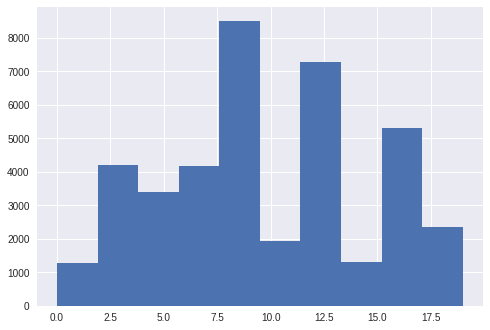

In [0]:
train["cuisine"].hist()

In [0]:
len(train["cuisine"].unique())

20

In [0]:
encoder.inverse_transform([0, 1, 2, 3])

array(['brazilian', 'british', 'cajun_creole', 'chinese'], dtype=object)

In [0]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval = train_test_split(train["ing"], train["cuisine"], test_size=0.25)

In [0]:
Xtrain.shape, ytrain.shape, Xval.shape, yval.shape

((29830,), (29830,), (9944,), (9944,))

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
veczr = CountVectorizer()

In [0]:
trn_term_doc = veczr.fit_transform(Xtrain)
val_term_doc = veczr.transform(Xval)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
model=LogisticRegression(C=0.1, dual=True)
model.fit(trn_term_doc,ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
prediction=model.predict(trn_term_doc)
predic_val = model.predict(val_term_doc)

In [0]:
np.sum(prediction==ytrain)/len(Xtrain), np.sum(predic_val==yval)/len(yval)

(0.7964130070398927, 0.7660901045856798)

In [0]:
X = trn_term_doc.sign()
Xv = val_term_doc.sign()
y = ytrain

In [0]:
model_1=LogisticRegression(C=0.1, dual=True)
model_1.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
prediction=model_1.predict(X)
predic_val_1 = model_1.predict(Xv)
np.sum(prediction==ytrain)/len(Xtrain), np.sum(predic_val_1==yval)/len(yval)

(0.7957425410660409, 0.7650844730490748)

**Random Forest with sign data**

In [0]:
from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier(n_estimators=100, min_samples_leaf=1)
model_3.fit(X, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
prediction=model_3.predict(X)
predic_val_3 = model_3.predict(Xv)
np.sum(prediction==ytrain)/len(Xtrain), np.sum(predic_val_3==yval)/len(yval)

(0.9997318136104593, 0.7555309734513275)

**2- Gram **

In [0]:
veczr = CountVectorizer(ngram_range=(1,2), max_features=50000)
train = veczr.fit_transform(Xtrain)
val=veczr.transform(Xval)


In [0]:
model=LogisticRegression(C=0.1, dual=True)
model.fit(train,ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
prediction=model.predict(train)
predic_val_1 = model.predict(val)
np.sum(prediction==ytrain)/len(ytrain), np.sum(predic_val_1==yval)/len(yval)

(0.8657727120348643, 0.7771520514883347)

In [0]:
test = pd.read_json("test.json")

In [0]:
test["ing"] = test["ingredients"].apply(lambda x: str(x).strip('[]'))
test["ing"] = test["ing"].apply(lambda x: str(x).strip(' '))

In [0]:
test_term_doc = veczr.transform(test["ing"])

In [0]:
predict_test =model.predict(test_term_doc)

**Submission**

In [0]:
!unzip sample_submission.csv.zip

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   


In [0]:
sample = pd.read_csv("sample_submission.csv")

In [0]:
sample["cuisine"] = encoder.inverse_transform(predict_test)

In [0]:
sample

,id,cuisine
0,35203,italian
1,17600,southern_us
2,35200,italian
3,17602,cajun_creole
4,17605,italian
5,17604,southern_us
6,5,italian
7,7,chinese
8,35209,mexican
9,11,british


In [0]:
sample.to_csv("submission_vyakya.csv")